In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [95]:
df = pd.read_csv('./data/2023-05-17_01_er_general_n1000_s5000.csv')
df2 = pd.read_csv('./data/2023-05-17_01_er_distinctSites_n1000_s5000.csv')


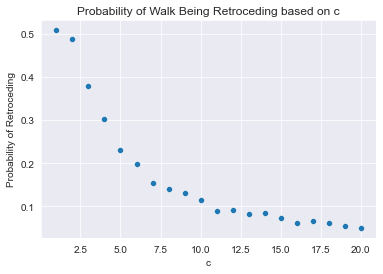

In [94]:
# Calculate the probability of the walk being retroceding based on the value of c
prob_retroceding = df.groupby('c')['is_retroceding'].mean()

# Create a bar plot to visualize the probabilities
sns.scatterplot(x=prob_retroceding.index, y=prob_retroceding.values)
plt.xlabel('c')
plt.ylabel('Probability of Retroceding')
plt.title('Probability of Walk Being Retroceding based on c')
plt.show()

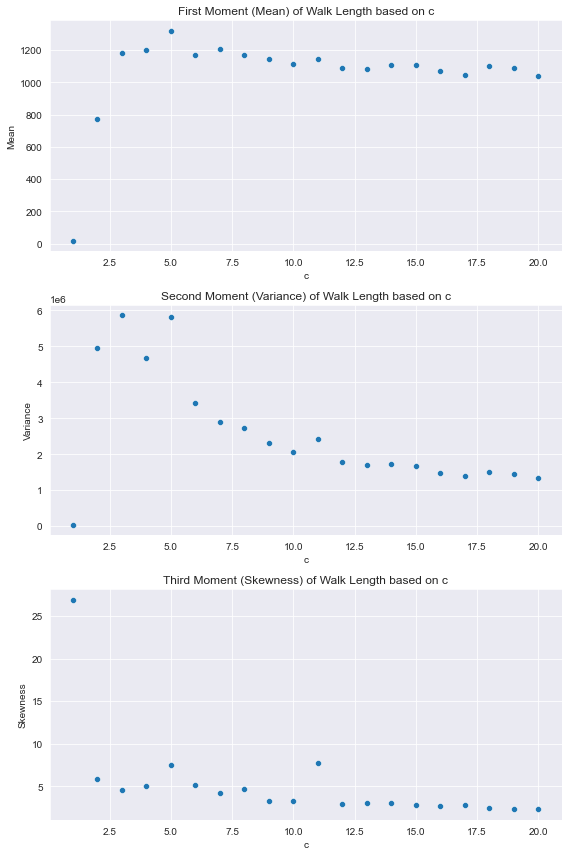

In [3]:
# Calculate the first, second, and third moments of walk_length based on the value of c
moments = df.groupby('c')['walk_length'].agg(['mean', 'var', 'skew'])

# Create subplots for each moment
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# Plot first moment (mean)
sns.scatterplot(x=moments.index, y=moments['mean'], ax=axes[0])
axes[0].set_xlabel('c')
axes[0].set_ylabel('Mean')
axes[0].set_title('First Moment (Mean) of Walk Length based on c')

# Plot second moment (variance)
sns.scatterplot(x=moments.index, y=moments['var'], ax=axes[1])
axes[1].set_xlabel('c')
axes[1].set_ylabel('Variance')
axes[1].set_title('Second Moment (Variance) of Walk Length based on c')

# Plot third moment (skewness)
sns.scatterplot(x=moments.index, y=moments['skew'], ax=axes[2])
axes[2].set_xlabel('c')
axes[2].set_ylabel('Skewness')
axes[2].set_title('Third Moment (Skewness) of Walk Length based on c')

plt.tight_layout()
plt.show()

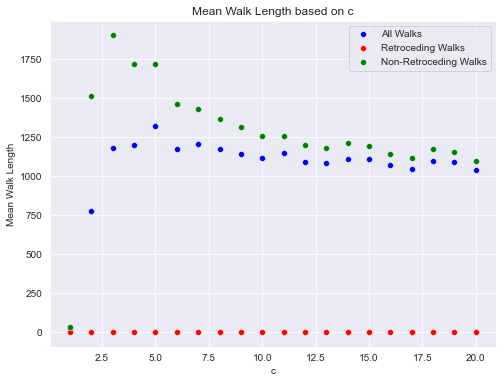

In [4]:
# Calculate the mean for all walks
mean_all = df.groupby('c')['walk_length'].mean()

# Calculate the mean for retroceding walks
mean_retroceding = df[df['is_retroceding']]['walk_length'].groupby(df['c']).mean()

# Calculate the mean for non-retroceding walks
mean_non_retroceding = df[~df['is_retroceding']]['walk_length'].groupby(df['c']).mean()

# Create the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mean_all.index, y=mean_all.values, color='blue', label='All Walks')
sns.scatterplot(x=mean_retroceding.index, y=mean_retroceding.values, color='red', label='Retroceding Walks')
sns.scatterplot(x=mean_non_retroceding.index, y=mean_non_retroceding.values, color='green',
                label='Non-Retroceding Walks')

# Set plot labels and title
plt.xlabel('c')
plt.ylabel('Mean Walk Length')
plt.title('Mean Walk Length based on c')

# Show the legend
plt.legend()
plt.show()

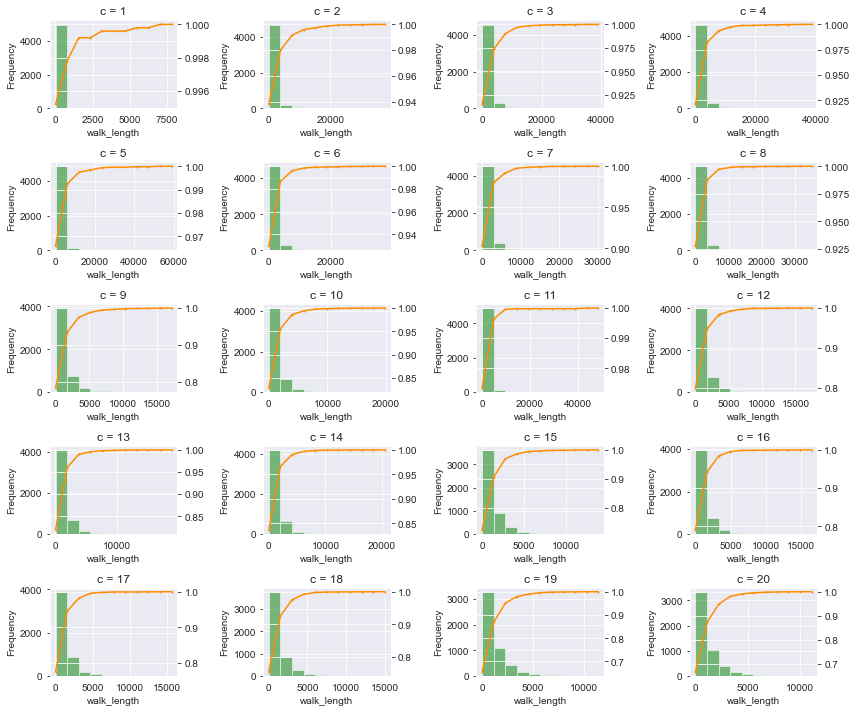

In [56]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_rows = 5
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, c in enumerate(c_values):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Filter the DataFrame for the current c value
    filtered_df = df[df['c'] == c]

    # Plot the distribution of walk_length for the current c value
    ax.set_title(f'c = {c}')
    ax.set_xlabel('walk_length')
    ax.set_ylabel('Frequency')

    values, base, _ = ax.hist(filtered_df['walk_length'], bins=10, alpha=0.5, color="green")
    values = np.append(values, 0)
    ax_bis = ax.twinx()
    ax_bis.plot(base, np.cumsum(values) / np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-',
                markersize=1)

plt.tight_layout()
plt.show()

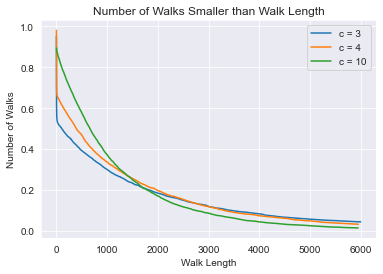

In [93]:
# Group the DataFrame by 'c'
grouped_df = df.groupby('c')

# Iterate over each group
for c_value, group in grouped_df:
    if c_value not in [3,4,10]:
        continue
    # Calculate the number of walks smaller than walk length for each value of 'walk_length'
    walks_smaller_than_length = group['walk_length'].value_counts().sort_index().cumsum()
    walks_smaller_than_length = 1 - walks_smaller_than_length / max(walks_smaller_than_length)
    walks_smaller_than_length = walks_smaller_than_length[walks_smaller_than_length.index < 6000]

    # Plot the data
    plt.plot(walks_smaller_than_length.index, walks_smaller_than_length.values, label=f'c = {c_value}')

#walks_smaller_than_length
# Set the plot title and labels
plt.title('Number of Walks Smaller than Walk Length')
plt.xlabel('Walk Length')
plt.ylabel('Number of Walks')

#Show the legend
plt.legend()

# Display the plot
plt.show()

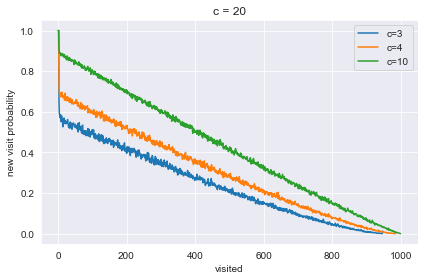

In [106]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_rows = 5
num_cols = 4


for i, c in enumerate(c_values):
    if c not in [3,4,10]:
        continue
    # Filter the DataFrame for the current c value
    filtered_df = df2[df2['c'] == c]
    plt.plot(filtered_df['visited'], filtered_df['new_visit_probability'], label=f'c={c}')

plt.title(f'c = {c}')
plt.xlabel('visited')
plt.ylabel('new visit probability')
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: 'PathCollection' object has no property 'stat'

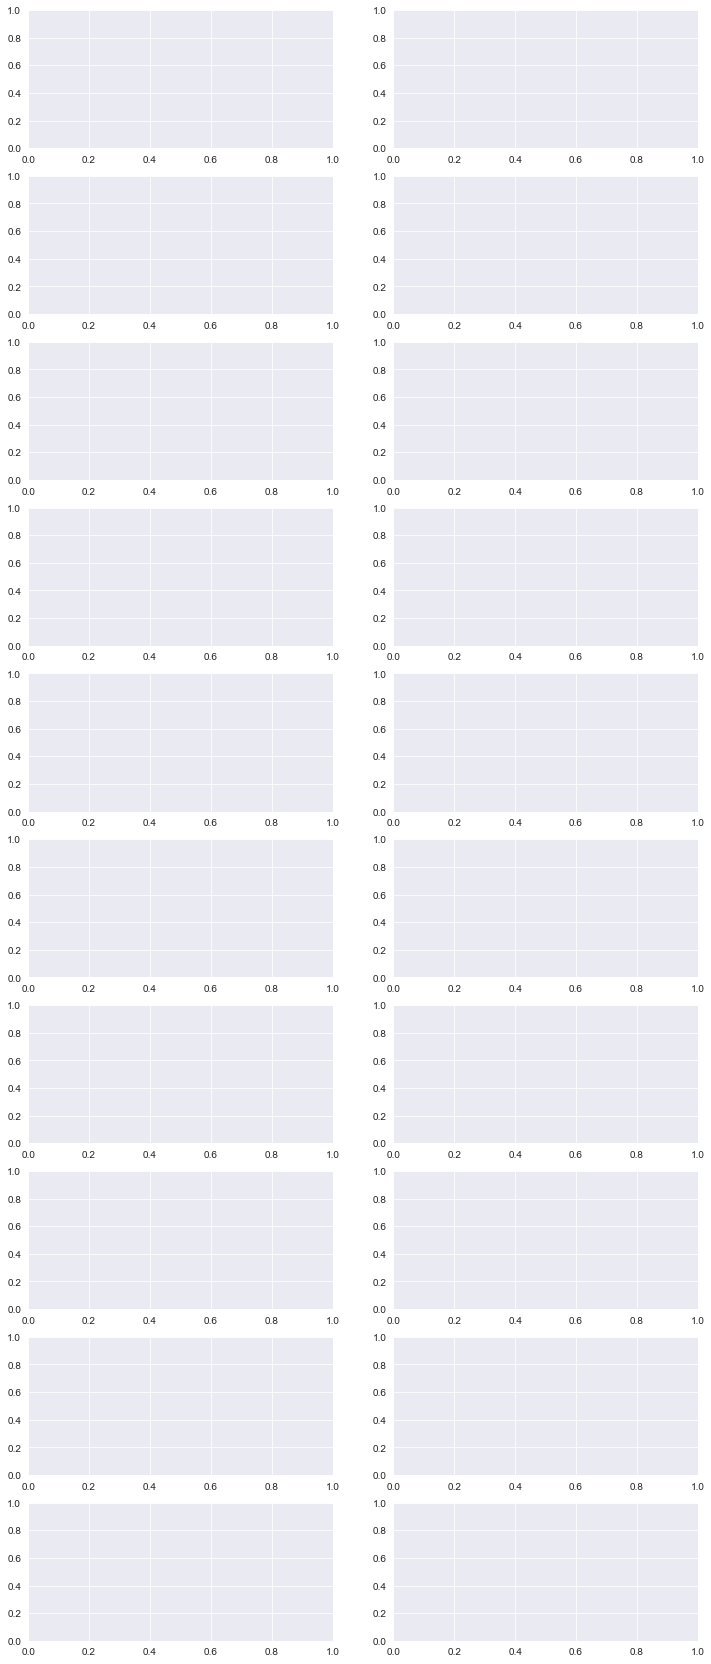

In [4]:
# Create the grid of subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 30))
axes = axes.flatten()

# Iterate over unique values of c
unique_c_values = df['c'].unique()
for i, c_value in enumerate(unique_c_values):
    filtered_df = df[df['c'] == c_value]
    sns.scatterplot(x='walk_length', data=filtered_df, ax=axes[i], stat='density', cumulative=True, element='step')
    axes[i].set_xlabel('Walk Length')
    axes[i].set_ylabel('Cumulative Density')
    axes[i].set_title(f'Tail Distribution of Walk Length for c = {c_value}')

if len(unique_c_values) < 10 * 2:
    for j in range(len(unique_c_values), 10 * 2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
